<a href="https://colab.research.google.com/github/AakashRaj-data/Exploratory-Data-analysis/blob/main/AirBnb_Bookings_Analysis_(AR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type - Exploratory Data Analysis (EDA)**
##### **Contribution    - Individual**
#####  **Name - Aakash Raj**


# **Project Summary -**

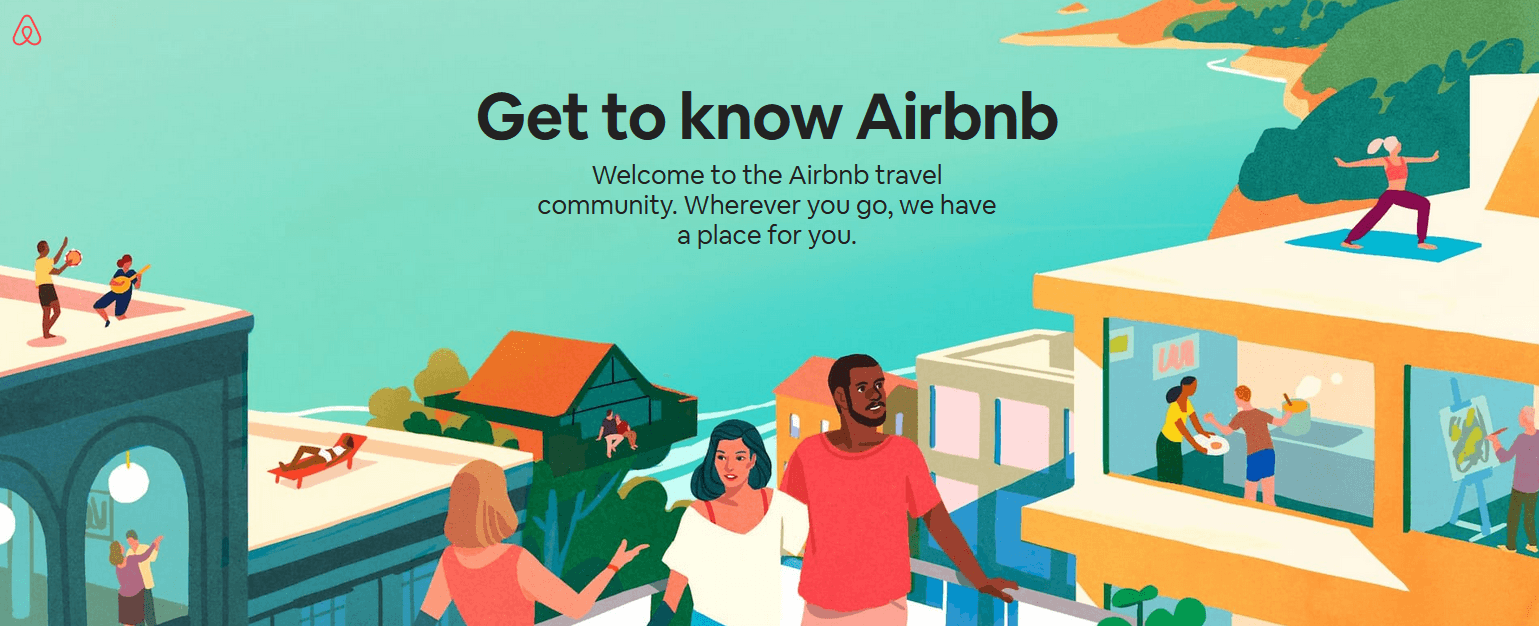

*   **The purpose of the analysis:** understanding the factors that influence Airbnb 🏠 prices in New York City, or identifying patterns of all variables and  Our analysis provides useful information for travelers and hosts in the city and also provides some best insights for Airbnb business

* The methodology includes data collection, exploratory analysis 📊, time-series examination ⏰, machine learning 🤖, and sentiment analysis 💬

* Through this process, we were able to identify and fix any issues with the data, and ensure that it was ready for further analysis. This is an important step in any data analysis project, as it allows us to work with high-quality data and avoid any potential biases or errors that could affect the results. The clean and prepared data can now be used to answer specific research

* Sentiment analysis extracts user preferences, satisfaction levels, and amenity impacts from reviews and ratings

* Key findings highlight price sensitivity, correlations between pricing changes and bookings, preferred amenities, and external factors' influence. Understanding user satisfaction reveals crucial aspects for a positive experience

* Implications offer recommendations for pricing optimization, enhancing user experiences, strategic marketing during peak seasons, and informing policymakers about market changes 📈


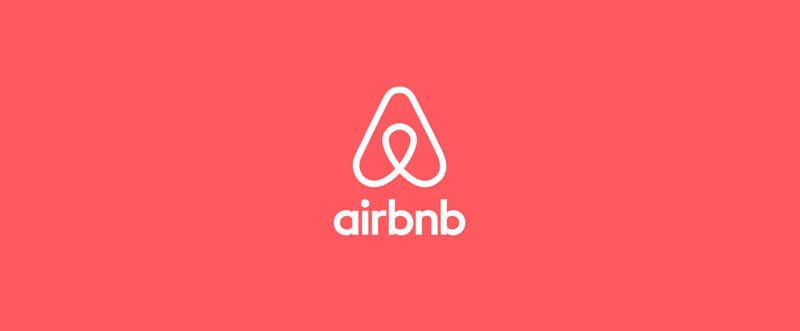

# **GitHub Link -**

https://github.com/AakashRaj-data/Exploratory-Data-analysis.git

# **Problem Statement**


Using a comprehensive Airbnb dataset encompassing details such as listing information, neighborhood counts, and price distribution, analyze and predict key factors influencing accommodation pricing trends in City. Leverage features like neighborhood groups, room types, and historical data to build a model that forecasts accommodation pricing. Additionally, explore insights into neighborhood popularity, identify influential factors impacting pricing variability, and propose recommendations for hosts to optimize their listings.

#### **Define Your Business Objective?**

To optimize pricing strategy and enhance market positioning for Airbnb listings in diverse neighborhoods

# ***Let's Begin !***

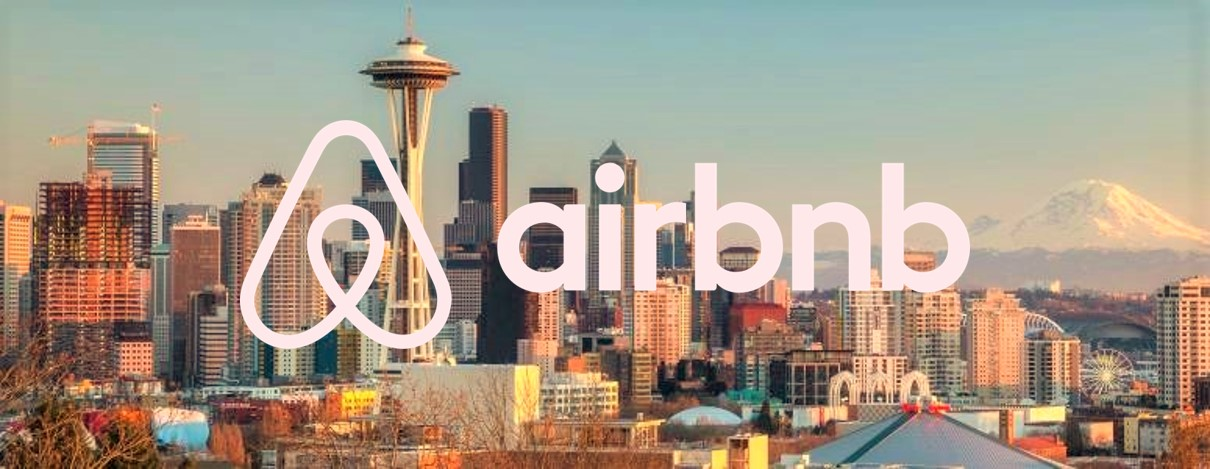

## ***1. Know Your Data***

### Import Libraries

In [14]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Load Dataset
airbnb_df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows,columns=airbnb_df.shape
print("No.of rows:",rows)
print("No.of columns:",columns)

No.of rows: 48895
No.of columns: 16


### Dataset Information

In [ ]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count=airbnb_df.duplicated().sum()
print(duplicate_count)

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_value=airbnb_df.isnull().sum()
print(missing_value)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# fill null values
airbnb_df['name'].fillna('No name', inplace=True)
airbnb_df['host_name'].fillna('not define', inplace=True)
airbnb_df['last_review'].fillna('No reviews', inplace=True)

In [42]:
print(airbnb_df.isnull().sum())

name                               0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
name_cleaned                      16
dtype: int64


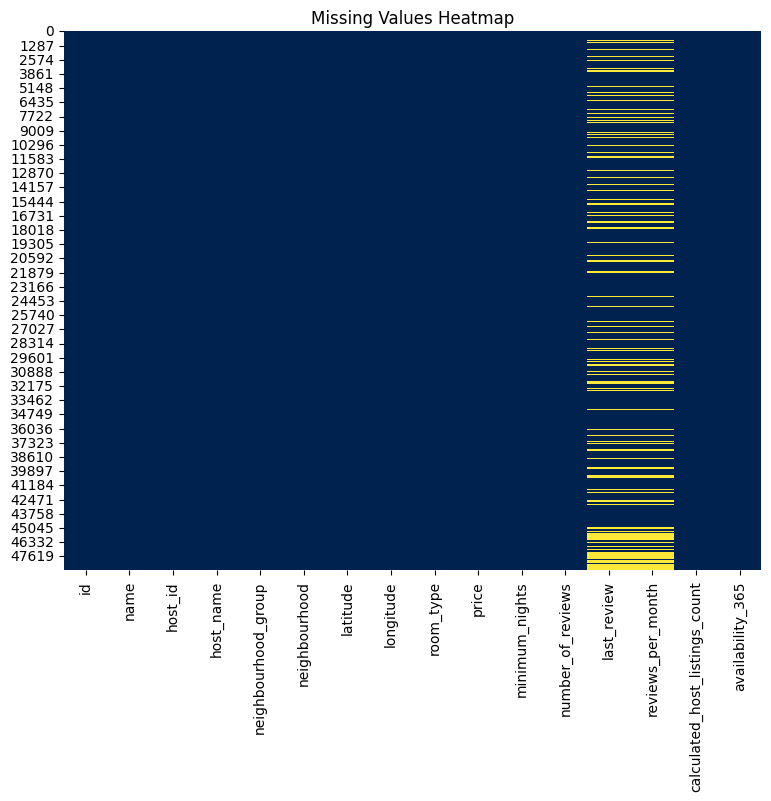

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(data=airbnb_df.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

![Airbnb Image](https://d3.harvard.edu/platform-digit/wp-content/uploads/sites/2/2020/04/unnamed-1-512x200.png)

##**About the Dataset – Airbnb Bookings**

*   This Airbnb dataset contains nearly 49,000 observations from New York , with 16 columns of data.

*   The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

*   This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

*   This dataset contains information about Airbnb bookings in New York City in 2019. By analyzing this data, you may be able to understand the trends and patterns of Airbnb use in the NYC.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Dataset Describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Note** - price column is very important so we have to find big outliers in
important columns we will remove it in Data Wrangling part


### Variables Description

##**UNDERSTAND THE GIVEN VARIABLES**

**Listing_id :-** This is a unique identifier for each listing in the dataset.

**Listing_name :-** This is the name or title of the listing, as it appears on the Airbnb website.

**Host_id :-** This is a unique identifier for each host in the dataset.

**Host_name :-** This is the name of the host as it appears on the Airbnb website.

**Neighbourhood_group :-** This is a grouping of neighborhoods in New York City, such as Manhattan or Brooklyn.

**Neighbourhood :-** This is the specific neighborhood in which the listing is located.

**Latitude :-** This is the geographic latitude of the listing.

**Longitude :-** This is the geographic longitude of the listing.

**Room_type :-** This is the type of room or property being offered, such as an entire home, private room, shared room.

**Price :-** This is the nightly price for the listing, in US dollars.

**Minimum_nights :-** This is the minimum number of nights that a guest must stay at the listing.

**Total_reviews :-** This is the total number of reviews that the listing has received.

**Reviews_per_month :-** This is the average number of reviews that the listing receives per month.

**Host_listings_count :-** This is the total number of listings that the host has on Airbnb.

**Availability_365 :-** This is the number of days in the next 365 days that the listing is available for booking

*  ***These variables have details regarding the identification, location, pricing, availability, host information, and guest feedback for Airbnb listings. Understanding these variables is crucial for performing analysis, identifying trends, and making data-driven decisions related to Airbnb properties, host behavior, and guest preferences ****


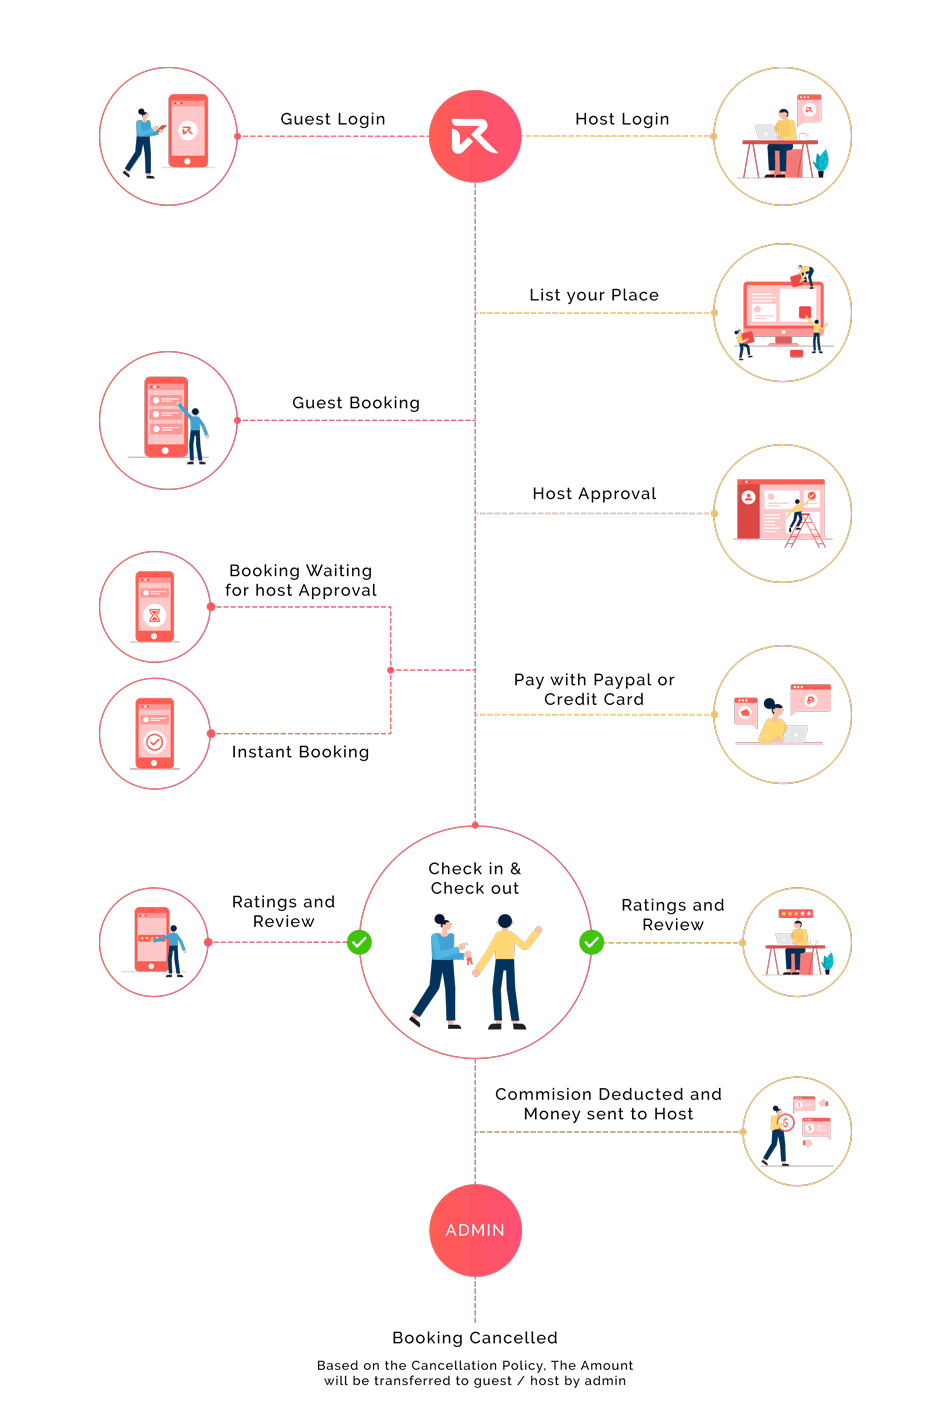

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
airbnb_df.nunique()

,0
id,48895
name,47905
host_id,37457
host_name,11452
neighbourhood_group,5
neighbourhood,221
latitude,19048
longitude,14718
room_type,3
price,674


## 3. ***Data Wrangling***

### Data Wrangling Code

In [35]:
# updating missing values of reviews_per_month column with NaN
airbnb_df['reviews_per_month'].fillna(np.nan, inplace=True)

# Convert the column to float type
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].astype(float)

# Fill NaN values with the median
airbnb_df['reviews_per_month'].fillna(airbnb_df['reviews_per_month'].median(), inplace=True)

In [19]:
#Drop the unspecific or unnecessary columns for analysis.

columns_to_drop = ['id', 'host_id']
airbnb_df.drop(columns=columns_to_drop, inplace=True)

In [20]:
# removed unnessary columns from dataframe lets see how looks by using head
airbnb_df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


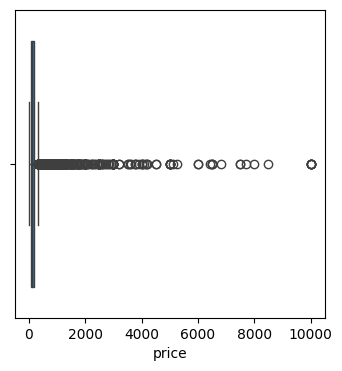

In [54]:
plt.figure(figsize = (4,4))
sns.boxplot(x = airbnb_df['price'])
plt.show()

In [55]:
# writing a fucntion to remove outliers using IQR Method

def remove_outliers_iqr(airbnb_df):
  for column in airbnb_df.columns:
      Q1 = airbnb_df["price"].quantile(0.25)
      Q3 = airbnb_df["price"].quantile(0.75)
      IQR = Q3 - Q1
      lower_limit = Q1 - (1.5 * IQR)
      upper_limit = Q3 + (1.5 * IQR)

      airbnb_df = airbnb_df[(airbnb_df["price"] >= lower_limit) & (airbnb_df["price"] <= upper_limit)]
  return airbnb_df
airbnb_df = remove_outliers_iqr(airbnb_df)

In [57]:
# after removing the outliers now the max price is 277

maximum_price = airbnb_df['price'].max()
print("Maximum Price:", maximum_price)

Maximum Price: 277


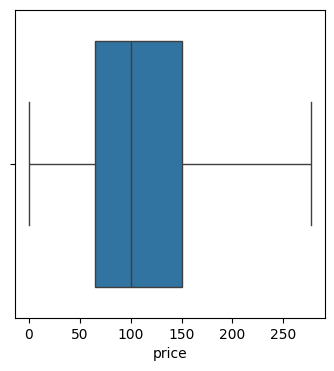

In [56]:
# lets visualise it with boxplot

plt.figure(figsize = (4,4))
sns.boxplot(x = airbnb_df['price'])
plt.show()

In [48]:
# Converting 'last_review' column to datetime format
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

In [22]:
# Sorting data based on 'price' in descending order
sorted_data = airbnb_df.sort_values('price', ascending=False)

In [23]:
# Grouping by 'neighbourhood_group' and finding average price
avg_price_neighbourhood = airbnb_df.groupby('neighbourhood_group')['price'].mean()
print(avg_price_neighbourhood)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


In [43]:
# Removing special characters and converting text to lowercase in 'name' column
airbnb_df['name_cleaned'] = airbnb_df['name'].str.replace('[^a-zA-Z0-9\s]', '').str.lower()
airbnb_df["name_cleaned"].fillna("no_name",inplace = True)

In [44]:
# Finally there are no null values
airbnb_df.head(5)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name_cleaned
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,clean & quiet apt home by the park
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,skylit midtown castle
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No reviews,0.72,1,365,the village of harlem....new york !
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,cozy entire floor of brownstone
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,entire apt: spacious studio/loft by central park


In [49]:
# Extracting month and year from 'last_review' column
airbnb_df['review_month'] = airbnb_df['last_review'].dt.month
airbnb_df['review_year'] = airbnb_df['last_review'].dt.year

In [50]:
maximum_price = airbnb_df['price'].max()
print("Maximum Price:", maximum_price)

Maximum Price: 10000


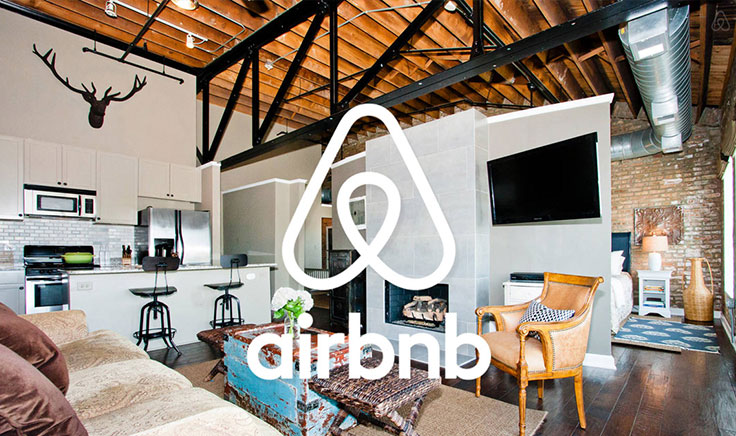

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***